# Collaborators:

- Niels Savvides
- Matisse Callewaert
- Thibaud Despriet

# Lab II: Feature Extraction
---

## Define Imports

In [292]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Define Global Helper Functions

In [293]:
def plot_comparison(original_img, new_img):
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1) 
    plt.imshow(original_img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(new_img, cmap='gray')
    plt.axis('off')
    
    plt.show()
    
def plot_comparison_gray(original_img, new_img):
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1) 
    plt.imshow(original_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(new_img, cmap='gray')
    plt.axis('off')
    
    plt.show()

## **Edge detection**

### Exercise I:

**Write a simple program that detects vertical edges in building.png**

#### Assignment I:

**Use the Sobel operator to calculate the horizontal first-order derivative. Ensure you capture and visualize the negative filter response values by using appropriate datatypes.**

For edge detection we are only interested in seeing the edges of the image. When we convert the image to grayscale first we can see the edges better. For visualization, we plot the original image next to the processed one.

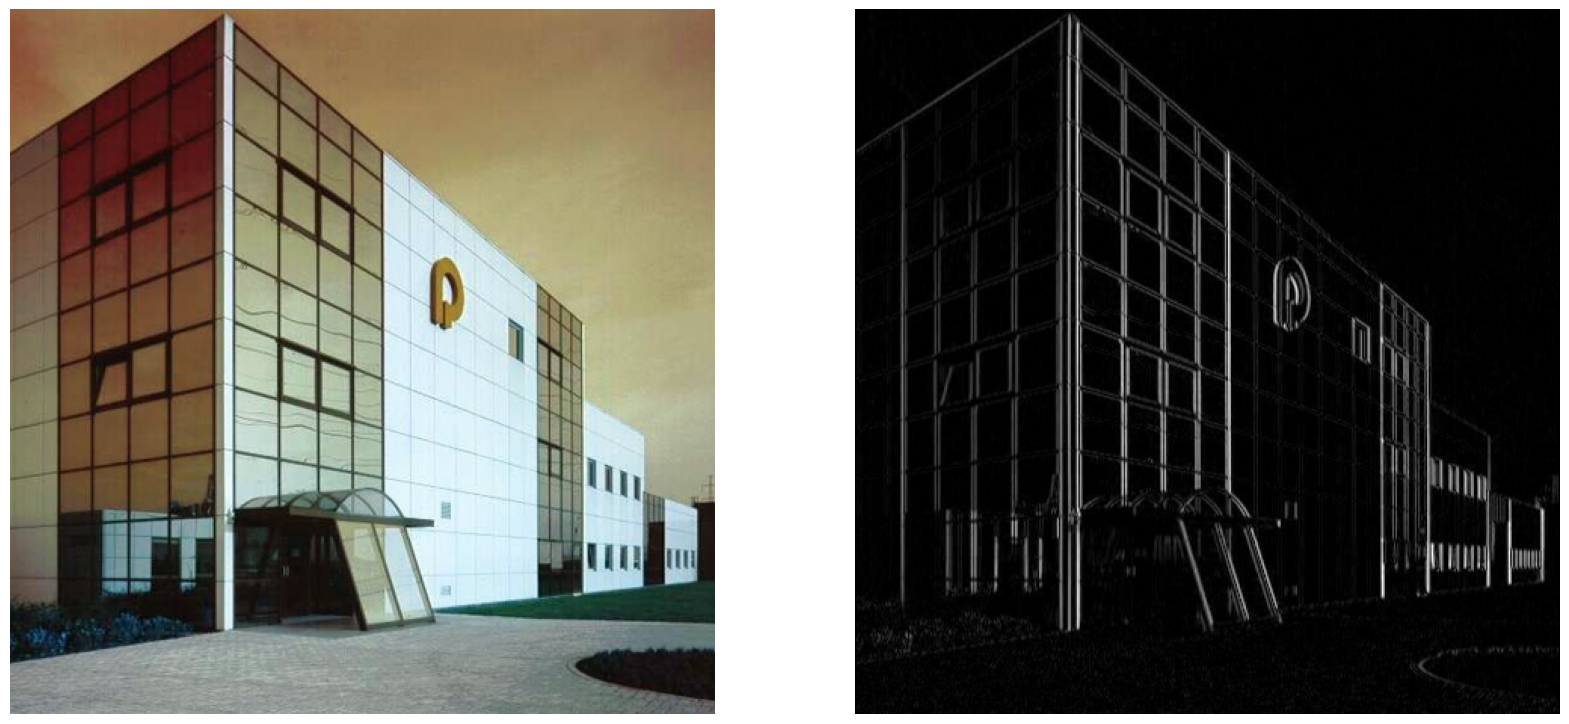

In [307]:
img_path = "source_images/building.png"
img = cv2.imread(img_path)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel operator in the x direction
sobel_x = cv2.Sobel(gray_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)

# Scaling and converting to uint8 to visualize the negative values properly
sobel_x_abs = np.absolute(sobel_x)
sobel_x_uint8 = np.uint8(sobel_x_abs * 255 / np.max(sobel_x_abs))

plot_comparison(img, sobel_x_uint8)

### Exercise II:

**Write a simple program to create a DoG (Degree of Gaussian) filter**

#### Assignment II:

**Create a 15x15 DoG filter**

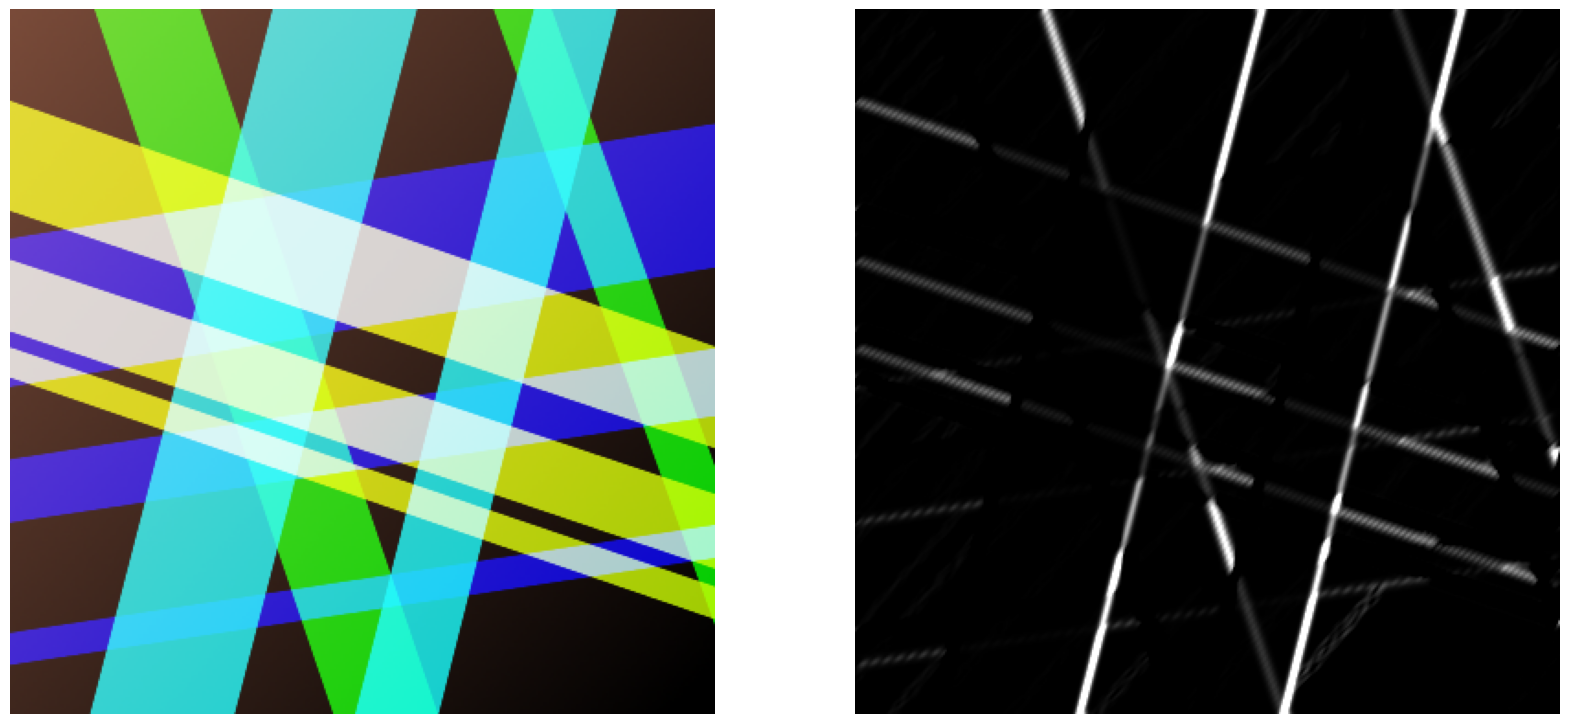

In [295]:
kernel_size = 15
sigma_1 = 2.0
sigma_2 = 1.0

# Create 1D Gaussian kernels
kernel_1 = cv2.getGaussianKernel(kernel_size, sigma_1)
kernel_2 = cv2.getGaussianKernel(kernel_size, sigma_2)

# Create a square matrix and insert the first kernel in the middle row
square_matrix = np.zeros((kernel_size, kernel_size))
square_matrix[kernel_size // 2] = kernel_1.T

# Filter the square matrix with the second kernel (kernel with smaller standard deviation) to create a 2D Gaussian
gaussian_2d = cv2.filter2D(square_matrix, -1, kernel_2.T)

# Derive the 2D Gaussian to obtain a DoG filter
dog_filter = cv2.Sobel(gaussian_2d, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(gaussian_2d, cv2.CV_64F, 0, 1, ksize=3)

# Rotate the DoG filter
center = (kernel_size // 2, kernel_size // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_dog_filter = cv2.warpAffine(dog_filter, rotation_matrix, (kernel_size, kernel_size))

# At this point, we have a valid DoG filter. Finally we get to apply it to our image.
img_path = "source_images/rays.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.filter2D(img, -1, rotated_dog_filter)

original_img = cv2.imread(img_path)

plot_comparison(original_img, edges)

While analyzing the problem, we identified a superior solution that diverges from the prescribed assignment plan. Upon executing this modified code, we achieved better results compared to our previous attempts. Despite deviating from the specified steps outlined in the assignment, we have documented this improvement for reference and transparency.

```py
img_path = "source_images/rays.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Define the Gaussian kernels
sigma1 = 1.0  
sigma2 = 3.0 
ksize = 31  # Odd number

# Create 1D Gaussian kernels
kernel1 = cv2.getGaussianKernel(ksize, sigma1)
kernel2 = cv2.getGaussianKernel(ksize, sigma2)

# Create 2D Gaussian kernels by outer product
gauss1 = kernel1 * kernel1.T
gauss2 = kernel2 * kernel2.T

# Create the DoG filter by subtracting the Gaussian kernels
dog_filter = gauss1 - gauss2

# Apply the DoG filter
filtered_img = cv2.filter2D(img, -1, dog_filter)

# Take the absolute value of the filter responses
filtered_img_abs = np.absolute(filtered_img) 

original_img = cv2.imread(img_path)

plot_comparison(original_img, filtered_img_abs)
```

#### Assignment III:

**Filter rays.png with a well chosen DoG filter so that in the resulting image, the edges of the
yellow strips stand out (you will need to take the absolute value of the responses)**

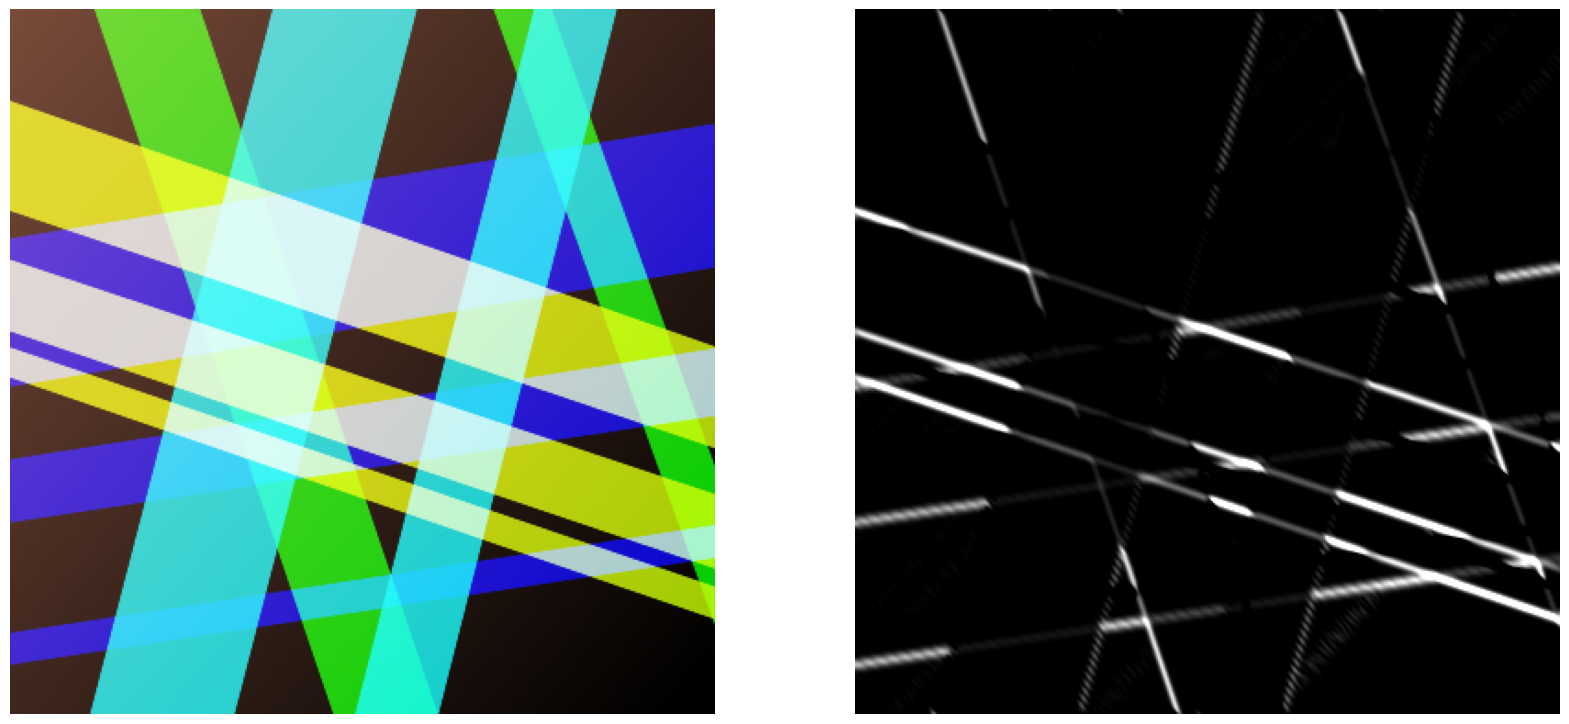

In [296]:
# Define the Gaussian kernels
kernel_size = 15
sigma_1 = 2.0
sigma_2 = 1.0

# Create 1D Gaussian kernels
kernel_1 = cv2.getGaussianKernel(kernel_size, sigma_1)
kernel_2 = cv2.getGaussianKernel(kernel_size, sigma_2)

# Create a square matrix and insert the first kernel in the middle row
square_matrix = np.zeros((kernel_size, kernel_size))
square_matrix[kernel_size // 2] = kernel_1.T

# Filter the square matrix with the second kernel (kernel with smaller standard deviation) to create a 2D Gaussian
gaussian_2d = cv2.filter2D(square_matrix, -1, kernel_2.T)

# Derive the 2D Gaussian to obtain a DoG filter
dog_filter = cv2.Sobel(gaussian_2d, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(gaussian_2d, cv2.CV_64F, 0, 1, ksize=3)

# Rotate the DoG filter
center = (kernel_size // 2, kernel_size // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, -50, 1.0)
rotated_dog_filter = cv2.warpAffine(dog_filter, rotation_matrix, (kernel_size, kernel_size))

# At this point, we have a valid DoG filter. Finally apply it to our image.
img_path = "source_images/rays.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.filter2D(img, -1, rotated_dog_filter)

original_img = cv2.imread(img_path)

plot_comparison(original_img, edges)

#### Question I:
What happens when your filter goes "accross the border" of the image?

<span style="color:green;">When a filter goes "across the border" of the image during convolution, it encounters a region where there are no pixel values defined, which means it lacks neighboring pixels to perform the filtering operation properly. 
This issue is commonly referred to as **the border problem** in image processing. This can lead to incomplete or distorted results near the image border. </span>

### Exercise III:

**Write a simple program that detects all the edges in rays.png**

#### Assignment IV:

**Apply Canny Edge detection with thresholds chosen so that the edges of all strips are detected**

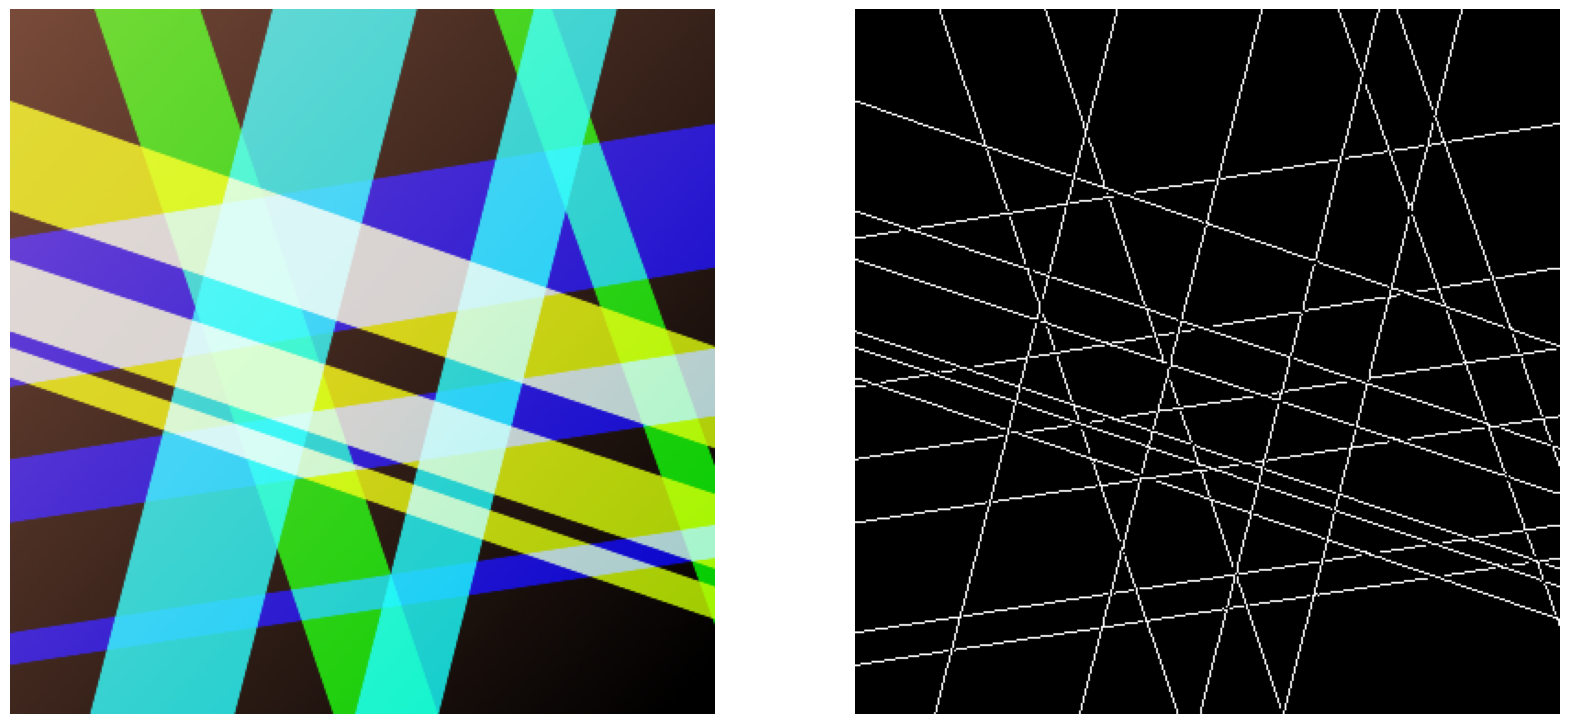

In [297]:
img_path = "source_images/rays.png"
original_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Compute the median of the gradient intensities to set as a basis for thresholding
median_val = np.median(img_gray)

# Apply Canny edge detection using auto-calculated thresholds
edges = cv2.Canny(img_gray, int(max(0, 0.1 * median_val)), int(min(255, 0.1 * median_val)))

# Plot the original and the edge-detected images
plot_comparison(original_img, edges)

## **Line fitting**

### Exercise IV:

**Write a simple program that does Hough line fitting to painting4.jpg**

#### Assignment V:

**Apply Canny Edge detection so that you get the four edges of the painting, and as few other edges as possible. It is inevitable that you find other edges however**

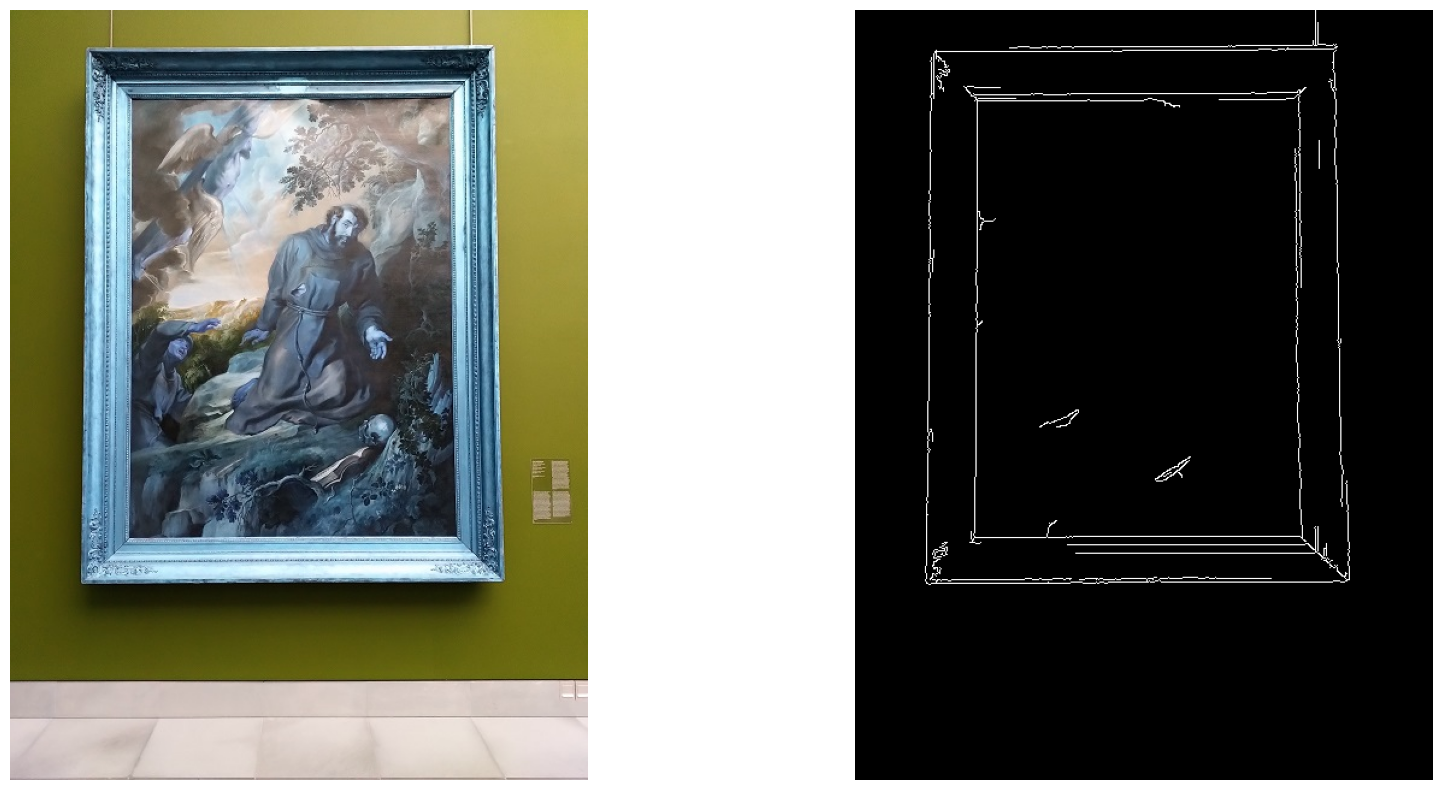

In [298]:
img_path = "source_images/painting4.jpg"
original_img = cv2.imread(img_path)
img_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Compute the median of the gradient intensities to set as a basis for thresholding
median_val = np.median(img_gray)

# Apply Canny edge detection using auto-calculated thresholds
edges = cv2.Canny(img_gray, int(max(0, 8.5 * median_val)), int(min(255, 1.5 * median_val)))

# Plot the original and the edge-detected images
plot_comparison(original_img, edges)

#### Assignment VI:

**Apply HoughLines to the result of Assignment __V__ and visualize the lines on the original image (use the __line__ function). It is normal to get too many lines, since you cannot get the Canny result perfect**

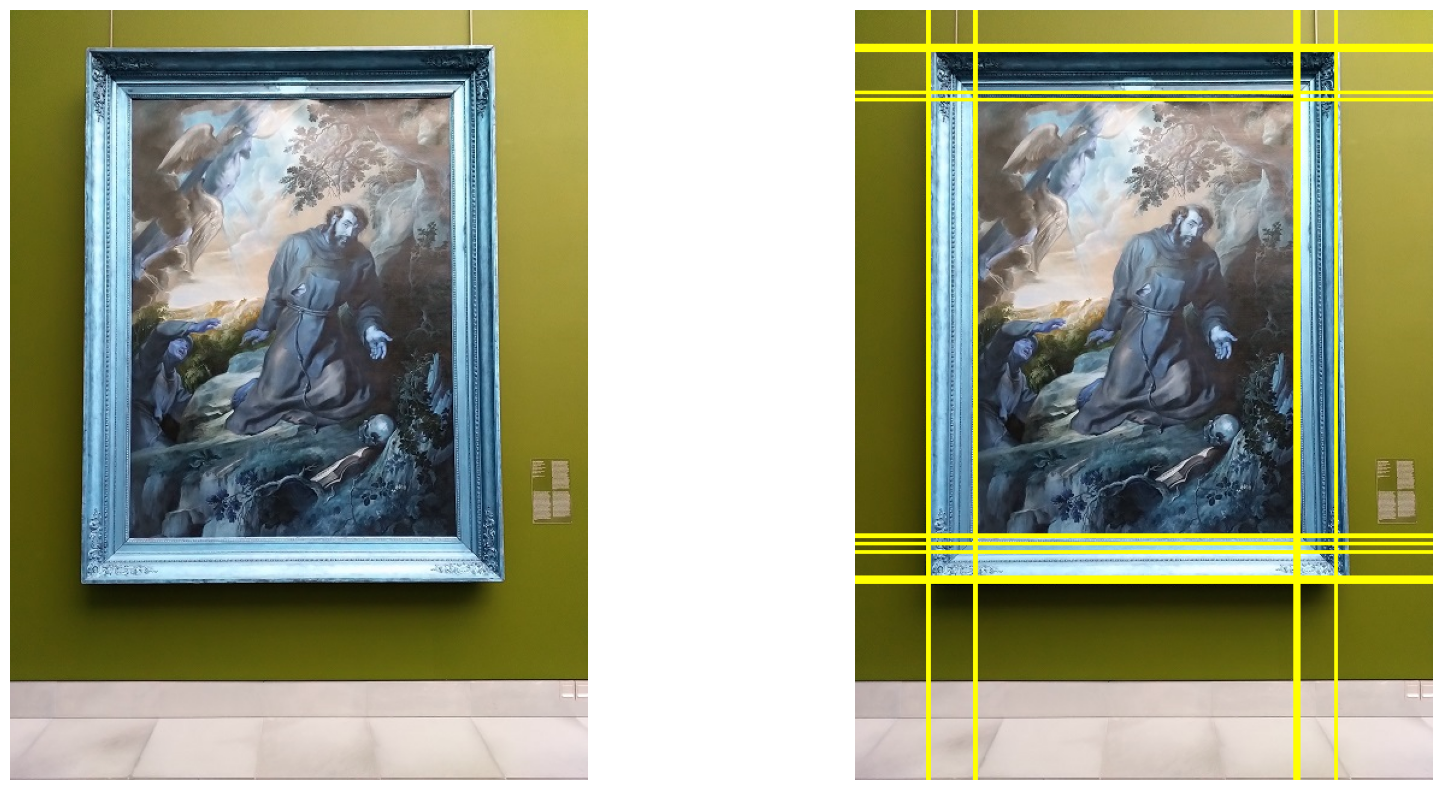

In [299]:
image = cv2.imread("source_images/painting4.jpg")

# Apply Hough Line Transformation
lines = cv2.HoughLines(edges, 0.01, np.pi/180, 80)

# Draw lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (255, 255, 0), 2)

plot_comparison(original_img, image)

## **Corner detection**

### Exercise V:

**Write a simple program that detects corners in two images. Try to match the corners across the images**

#### Assignment VII:

**Detect Harris corners in shot1.png and shot2.png and visualize them side by side**

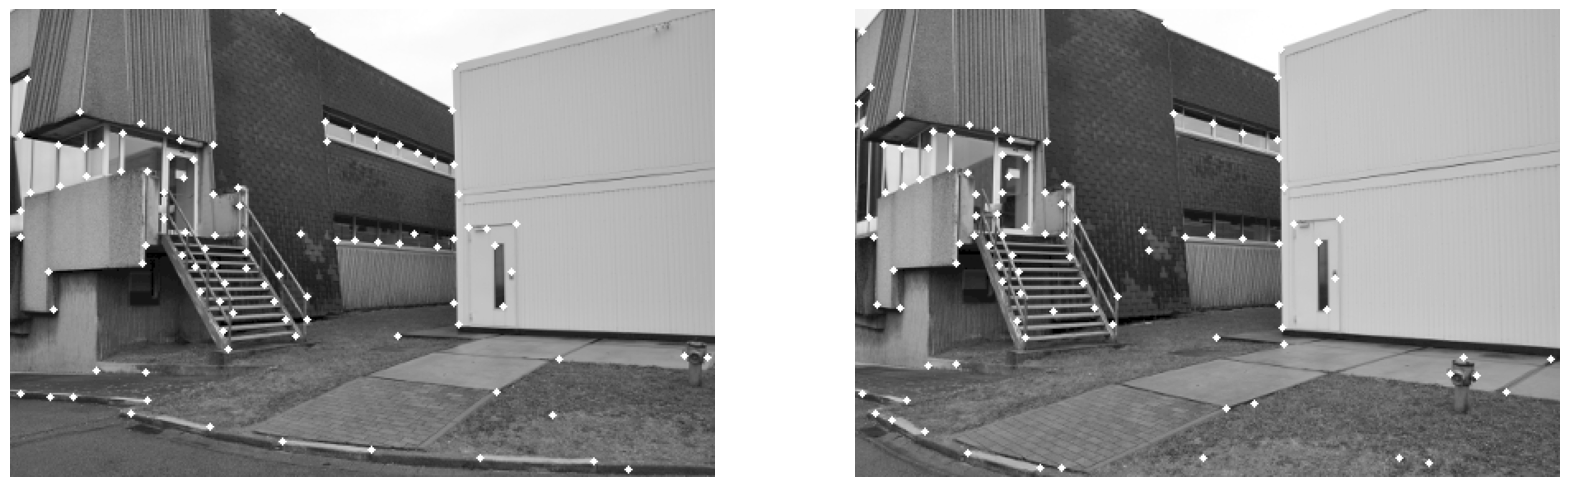

In [300]:
image1 = cv2.imread('source_images/shot1.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('source_images/shot2.png', cv2.IMREAD_GRAYSCALE)

# Detect Harris corners
corners1 = cv2.goodFeaturesToTrack(image1, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners2 = cv2.goodFeaturesToTrack(image2, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Visualize corners
image1_corners = image1.copy()
image2_corners = image2.copy()

for corner in corners1:
    x, y = corner.ravel()
    cv2.circle(image1_corners, (int(x), int(y)), 2, 255, -1)

for corner in corners2:
    x, y = corner.ravel()
    cv2.circle(image2_corners, (int(x), int(y)), 2, 255, -1)

plot_comparison_gray(image1_corners, image2_corners)

> Question II: Name two kinds of problems you foresee in trying to match these corners

<span style="color:green;">

- **Illumination Changes**: Variations in lighting conditions between the two images can significantly alter the appearance of corners. Changes in brightness, shadows, or color can make it difficult to find a reliable match for a corner in one image with its counterpart in the other image. Harris corner detection is sensitive to such changes, which can result in mismatches.

- **3D Perspective Changes**: When objects in the scene undergo rotations or changes in perspective due to 3D motion, the appearance of corners may vary. Matching corners across images with different perspectives becomes challenging, as the geometric transformation introduces distortions.

</span>

#### Assignemnt VIII:

**Detect ORB features in each of the two original images, calculate the ORB descriptors for them, and match the descriptors between the two images. Visualize the 32 best matches**

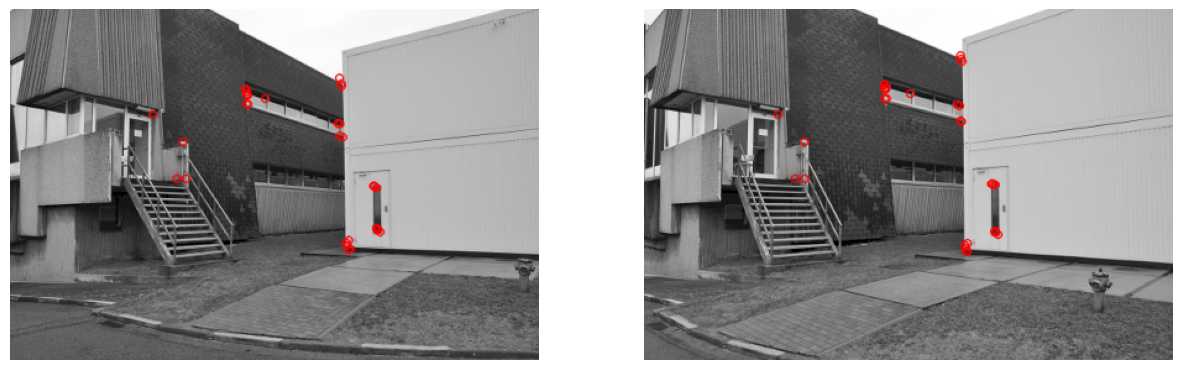

There are 164 matches detected, of which the 32 best are visualised


In [301]:
def match_orb_features(img_path1, img_path2):
    img1 = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img_path2, cv2.IMREAD_GRAYSCALE)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Create BFMatcher and match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)
    # Draw keypoints on both images
    img1_with_keypoints = cv2.drawKeypoints(img1, [kp1[m.queryIdx] for m in matches[:32]], None, color=(255, 0, 0), flags=0)
    img2_with_keypoints = cv2.drawKeypoints(img2, [kp2[m.trainIdx] for m in matches[:32]], None, color=(255, 0, 0), flags=0)

    plt.figure(figsize=(15,7))
    plt.subplot(121), plt.imshow(img1_with_keypoints, cmap='gray')
    plt.axis('off')
    plt.subplot(122), plt.imshow(img2_with_keypoints, cmap='gray')
    plt.axis('off')
    plt.show()
    
    print(f"There are {len(matches)} matches detected, of which the 32 best are visualised")

# Match features between the two images
match_orb_features('source_images/shot1.png', 'source_images/shot2.png')